In [1]:
# importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import requests
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
# Paleta Zika
paleta_zika = ['cadetblue', 'darkturquoise', 'cyan', 'teal', 'darkslategray', 'paleturquoise', 'aquamarine', 'mediumaquamarine', 'mediumspringgreen']

In [3]:
# Aplique globalmente (opcional)
sns.set_palette(paleta_zika)  # Define a paleta

In [4]:
zika_casos_por_ano = pd.read_csv('zika_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
zika_casos_por_ano.head()

,UF de notificação,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,1881,516,271,441,588,294,315,496,2154,6956
1,12 Acre,1531,295,365,150,305,622,104,908,656,4936
2,13 Amazonas,6023,699,469,122,133,223,360,367,222,8618
3,14 Roraima,362,855,155,191,74,194,118,300,365,2614
4,15 Pará,6632,1456,808,402,440,252,578,460,728,11756


In [3]:
zika_casos_por_ano.to_excel('planilha_casos_zika.xlsx')

In [5]:
# removendo a coluna total - zika
zika_casos_por_ano.drop(columns=['Total'], inplace=True)
zika_casos_por_ano.head()

,UF de notificação,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11 Rondônia,1881,516,271,441,588,294,315,496,2154
1,12 Acre,1531,295,365,150,305,622,104,908,656
2,13 Amazonas,6023,699,469,122,133,223,360,367,222
3,14 Roraima,362,855,155,191,74,194,118,300,365
4,15 Pará,6632,1456,808,402,440,252,578,460,728


In [13]:
# Removendo a linha 'Total'
zika_casos_por_ano.drop((27), inplace=True)

In [11]:
zika_casos_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF de notificação  28 non-null     object
 1   2016               28 non-null     int64 
 2   2017               28 non-null     int64 
 3   2018               28 non-null     int64 
 4   2019               28 non-null     int64 
 5   2020               28 non-null     int64 
 6   2021               28 non-null     int32 
 7   2022               28 non-null     int32 
 8   2023               28 non-null     int32 
 9   2024               28 non-null     int32 
dtypes: int32(4), int64(5), object(1)
memory usage: 1.9+ KB


In [8]:
colunas_converter = ['2021', '2022', '2023', '2024']
zika_casos_por_ano[colunas_converter] = zika_casos_por_ano[colunas_converter].apply(pd.to_numeric, errors='coerce').fillna(0)

In [10]:
# Convertendo as colunas para inteiros
zika_casos_por_ano[colunas_converter] = zika_casos_por_ano[colunas_converter].astype(int)

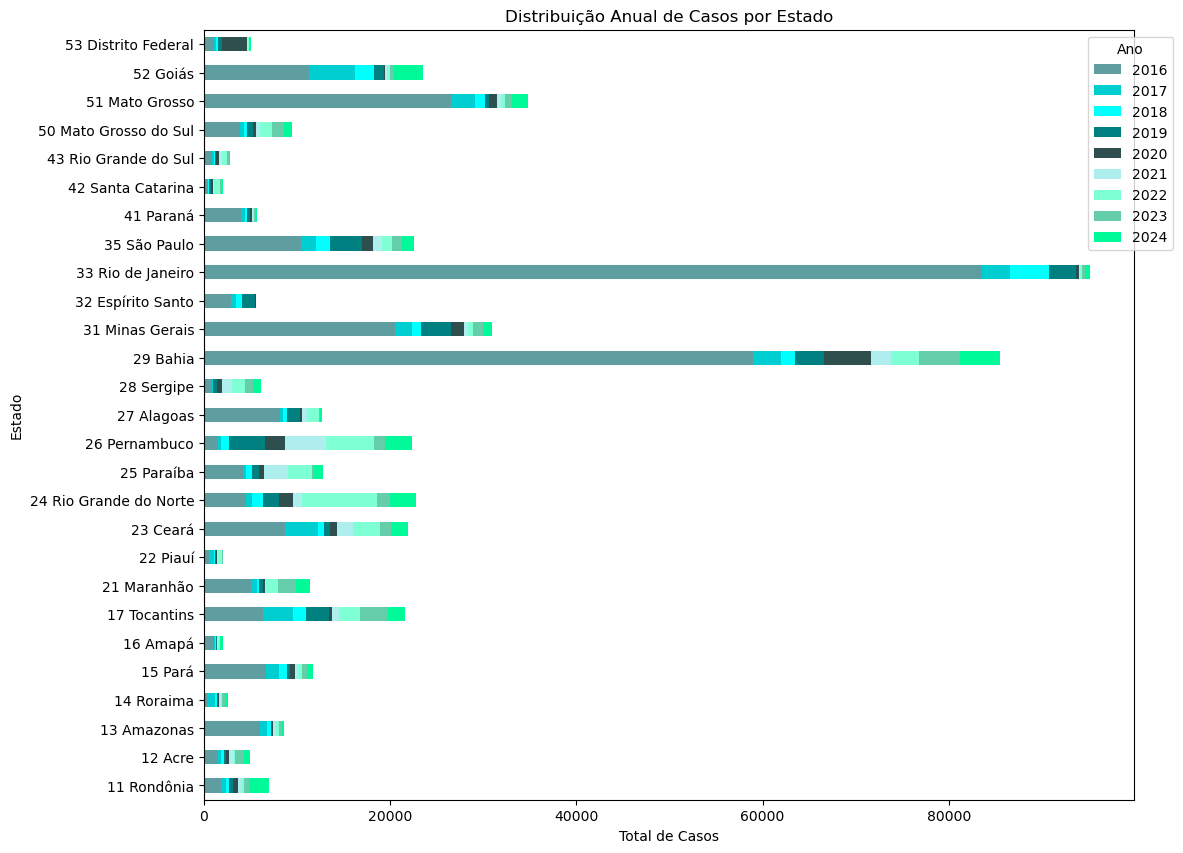

In [14]:
zika_casos_por_ano.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title('Distribuição Anual de Casos por Estado')
plt.xlabel('Total de Casos')
plt.ylabel('Estado')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))

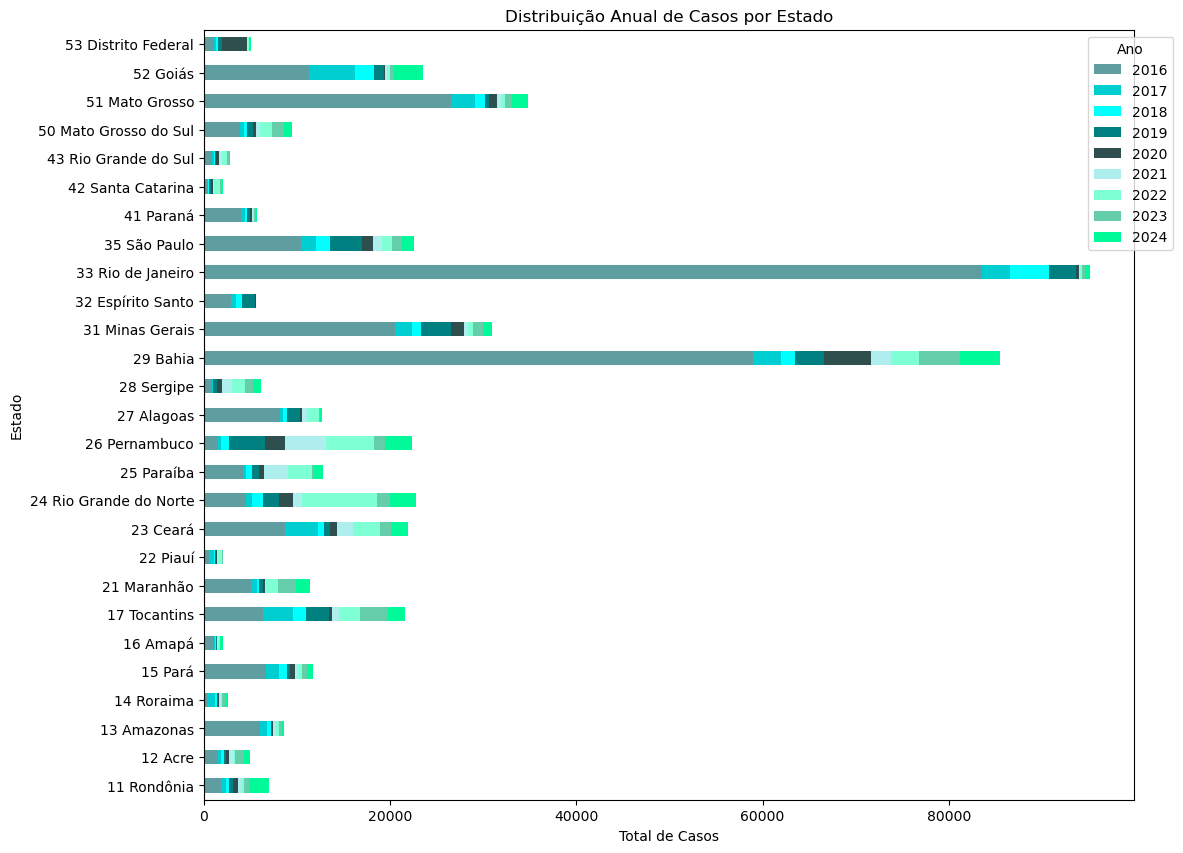

In [15]:
with PdfPages('zika_casos_por_ano.pdf') as pdf:
    zika_casos_por_ano.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 10))
    plt.title('Distribuição Anual de Casos por Estado')
    plt.xlabel('Total de Casos')
    plt.ylabel('Estado')
    plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))
    pdf.savefig()